In [9]:
import pandas as pd
import statsmodels.formula.api as smf
from cfg import CFG
import numpy as np
from scipy.stats import pearsonr

In [27]:
bs = 16
lr = 1e-5

In [28]:
data = pd.read_csv(f'../data/bigbird_bs{bs}_lr{lr}.csv')
Ｘ = data.iloc[:, 3:7]
y = data.iloc[:, 2:3]
model = smf.ols('y~X', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     224.8
Date:                Wed, 06 Sep 2023   Prob (F-statistic):          2.50e-190
Time:                        14:41:21   Log-Likelihood:                -24291.
No. Observations:               28470   AIC:                         4.859e+04
Df Residuals:                   28465   BIC:                         4.863e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3988      0.016     25.027      0.0

In [29]:
data.head()

,item_id,softmax,shannonent,avg_word_embedding,avg_sentence_embedding,lenvenshtein,pos
0,7048_0,"[0.7837331891059875, 0.005570510867983103, 0.2...",0.791519,0.519230,0.000852,0.302778,1.000000
1,7048_1,"[0.9926437735557556, 9.530778334010392e-05, 0....",0.063673,0.186091,0.000736,0.548942,1.000000
2,7048_2,"[2.0860426957369782e-05, 0.006974176503717899,...",0.089148,0.226973,0.000661,0.000000,1.000000
3,7048_3,"[0.001094010309316218, 0.0016074816230684519, ...",0.090308,0.156507,0.000431,0.309524,0.666667
4,7048_4,"[0.00015024287858977914, 0.0001121808527386747...",0.011499,0.409096,0.005162,0.211111,1.000000


In [30]:
avg_word_embedding = np.array(data['avg_word_embedding'])
avg_sentence_embedding = np.array(data['avg_sentence_embedding'])
lenvenshtein = np.array(data['lenvenshtein'])
pos = np.array(data['pos'])
y = np.array(data['shannonent'])
avg_word_embedding_pc = pearsonr(avg_word_embedding, y)
avg_sentence_embedding_pc = pearsonr(avg_sentence_embedding, y)
lenvenshtein_pc = pearsonr(lenvenshtein, y)
pos_pc = pearsonr(pos, y)
print('avg_word_embedding的皮尔逊相关系数: %f'%avg_word_embedding_pc[0])
print('avg_sentence_embedding的皮尔逊相关系数: %f'%avg_sentence_embedding_pc[0])
print('lenvenshtein的皮尔逊相关系数: %f'%lenvenshtein_pc[0])
print('pos的皮尔逊相关系数: %f'%pos_pc[0])

avg_word_embedding的皮尔逊相关系数: 0.066597
avg_sentence_embedding的皮尔逊相关系数: 0.153885
lenvenshtein的皮尔逊相关系数: 0.024419
pos的皮尔逊相关系数: 0.052160


In [31]:
# Min–max normalization
def min_max_y(raw_data):
    min_max_data = []

    # Min–max normalization
    for d in raw_data:
        min_max_data.append((d - min(raw_data)) / (max(raw_data) - min(raw_data)))
    return min_max_data

In [34]:
avg_word_embedding = np.array(min_max_y(avg_word_embedding))
avg_sentence_embedding = np.array(min_max_y(avg_sentence_embedding))
lenvenshtein = np.array(min_max_y(lenvenshtein))
y = np.array(min_max_y(y))
avg_word_embedding_pc = pearsonr(avg_word_embedding, y)
avg_sentence_embedding_pc = pearsonr(avg_sentence_embedding, y)
lenvenshtein_pc = pearsonr(lenvenshtein, y)
pos_pc = pearsonr(pos, y)
print('avg_word_embedding的皮尔逊相关系数: %f'%avg_word_embedding_pc[0])
print('avg_sentence_embedding的皮尔逊相关系数: %f'%avg_sentence_embedding_pc[0])
print('lenvenshtein的皮尔逊相关系数: %f'%lenvenshtein_pc[0])
print('pos的皮尔逊相关系数: %f'%pos_pc[0])

avg_word_embedding的皮尔逊相关系数: 0.066597
avg_sentence_embedding的皮尔逊相关系数: 0.153885
lenvenshtein的皮尔逊相关系数: 0.024419
pos的皮尔逊相关系数: 0.052160


In [43]:
bs16_lr1e4_data = pd.read_csv('../data/bigbird_bs16_lr0.0001.csv')
bs16_lr1e5_data = pd.read_csv('../data/bigbird_bs16_lr1e-05.csv')
bs16_lr3e5_data = pd.read_csv('../data/bigbird_bs16_lr3e-05.csv')
bs32_lr1e4_data = pd.read_csv('../data/bigbird_bs32_lr0.0001.csv')
bs32_lr1e5_data = pd.read_csv('../data/bigbird_bs32_lr1e-05.csv')
bs32_lr3e5_data = pd.read_csv('../data/bigbird_bs32_lr3e-05.csv')

In [45]:
bs16_lr1e4_shannonent = bs16_lr1e4_data['shannonent']
bs16_lr1e5_shannonent = bs16_lr1e5_data['shannonent']
bs16_lr3e5_shannonent = bs16_lr3e5_data['shannonent']
bs32_lr1e4_shannonent = bs32_lr1e4_data['shannonent']
bs32_lr1e5_shannonent = bs32_lr1e5_data['shannonent']
bs32_lr3e5_shannonent = bs32_lr3e5_data['shannonent']

In [51]:
bs16_lr1e4_shannonent

0        1.744295
1        1.598728
2        1.776917
3        1.493887
4        1.758952
           ...   
28465    0.102373
28466    0.803554
28467    0.125443
28468    1.000170
28469    0.406574
Name: shannonent, Length: 28470, dtype: float64

In [54]:
avg_shannonent = (bs16_lr1e4_shannonent+bs16_lr1e5_shannonent+bs16_lr3e5_shannonent+bs32_lr1e4_shannonent+bs32_lr1e5_shannonent+bs32_lr3e5_shannonent)/6
y = np.array(avg_shannonent)
y

array([1.07274489, 0.67058023, 0.8485948 , ..., 0.29146528, 0.58866186,
       0.42268864])

In [55]:
avg_word_embedding_pc = pearsonr(avg_word_embedding, y)
avg_sentence_embedding_pc = pearsonr(avg_sentence_embedding, y)
lenvenshtein_pc = pearsonr(lenvenshtein, y)
pos_pc = pearsonr(pos, y)
print('avg_word_embedding的皮尔逊相关系数: %f'%avg_word_embedding_pc[0])
print('avg_sentence_embedding的皮尔逊相关系数: %f'%avg_sentence_embedding_pc[0])
print('lenvenshtein的皮尔逊相关系数: %f'%lenvenshtein_pc[0])
print('pos的皮尔逊相关系数: %f'%pos_pc[0])

avg_word_embedding的皮尔逊相关系数: 0.045465
avg_sentence_embedding的皮尔逊相关系数: 0.139386
lenvenshtein的皮尔逊相关系数: 0.030787
pos的皮尔逊相关系数: 0.061197


In [73]:
bins = np.arange(0, 2.1, 0.1)
counts, _ = np.histogram(avg_shannonent, bins)
for i in range(len(counts)):
    print(f"Group {i+1}: {counts[i]}")

Group 1: 2
Group 2: 13
Group 3: 339
Group 4: 2252
Group 5: 1845
Group 6: 2111
Group 7: 3148
Group 8: 2435
Group 9: 1967
Group 10: 1879
Group 11: 1863
Group 12: 1787
Group 13: 1745
Group 14: 1654
Group 15: 1569
Group 16: 1359
Group 17: 1129
Group 18: 845
Group 19: 420
Group 20: 108


In [74]:
import matplotlib.pyplot as plt

In [94]:
x = [x*0.1 for x in range(0, 21)]
x

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2000000000000002,
 1.3,
 1.4000000000000001,
 1.5,
 1.6,
 1.7000000000000002,
 1.8,
 1.9000000000000001,
 2.0]

In [96]:
counts

array([   2,   13,  339, 2252, 1845, 2111, 3148, 2435, 1967, 1879, 1863,
       1787, 1745, 1654, 1569, 1359, 1129,  845,  420,  108])

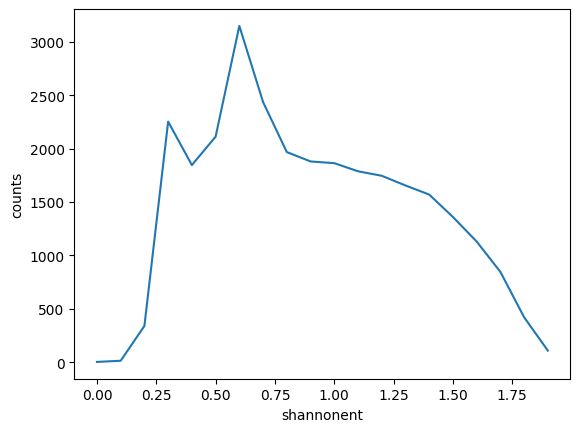

In [101]:
plt.plot(np.arange(0, 2, 0.1), counts)
plt.xlabel('shannonent')
plt.ylabel('counts')
plt.show()
